In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import os.path as op
%matplotlib inline
import mne
from mne.datasets import sample
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
matplotlib.rcParams.update({'font.size': 15})

In [57]:
#data path for each run of each subject.
data_path = 'E:\eeg_data'

#data path on my external hdd for folder containing all tests of each subject in one file
drive_all_data_path = 'E:\eeg_data\ica_140_500_0.1'



In [58]:
#read data
epoch = mne.read_epochs(op.join(data_path, 'Ex10_Suj1_Run1-epo.fif'),
                          preload=True)

Reading E:\eeg_data\Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [59]:
#display epoch event_id. 
#what does it mean?
epoch.event_id

{u'after': 20, u'before': 10, u'new': 4, u'scramble': 5}

In [60]:
#print sample of events
epoch.events[:5]

array([[ 6065,     0,     4],
       [22649,     0,     5],
       [24865,     0,    20],
       [28615,     0,    10],
       [32065,     0,     5]])

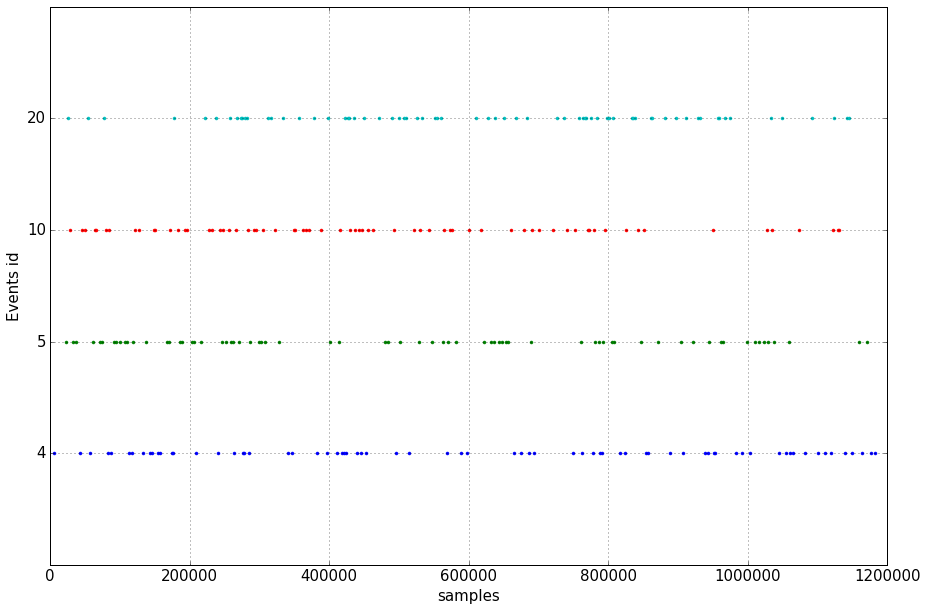

In [61]:
#plot events - don't what this means.
mne.viz.plot_events(epoch.events);

In [62]:
#read run 2 of subject 1
epoch_1 = mne.read_epochs(op.join(data_path, 'Ex10_Suj1_Run2-epo.fif'),
                          preload=True)

Reading E:\eeg_data\Ex10_Suj1_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [63]:
#print a sample of events
print(epoch.events[:5])
print('\n')
print(epoch_1.events[:5])

[[ 6065     0     4]
 [22649     0     5]
 [24865     0    20]
 [28615     0    10]
 [32065     0     5]]


[[ 5091     0     4]
 [ 7908     0     4]
 [11542     0     4]
 [13375     0     4]
 [22975     0     5]]


280 matching events found
Projection vector "Average EEG reference" has magnitude 0.02 (should be unity), applying projector with 1/61 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0 bad epochs dropped


<ipython-input-90-655f03b73145>:1: RuntimeWarning: Projection vector "Average EEG reference" has magnitude 0.02 (should be unity), applying projector with 1/61 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  epoch.plot_image()


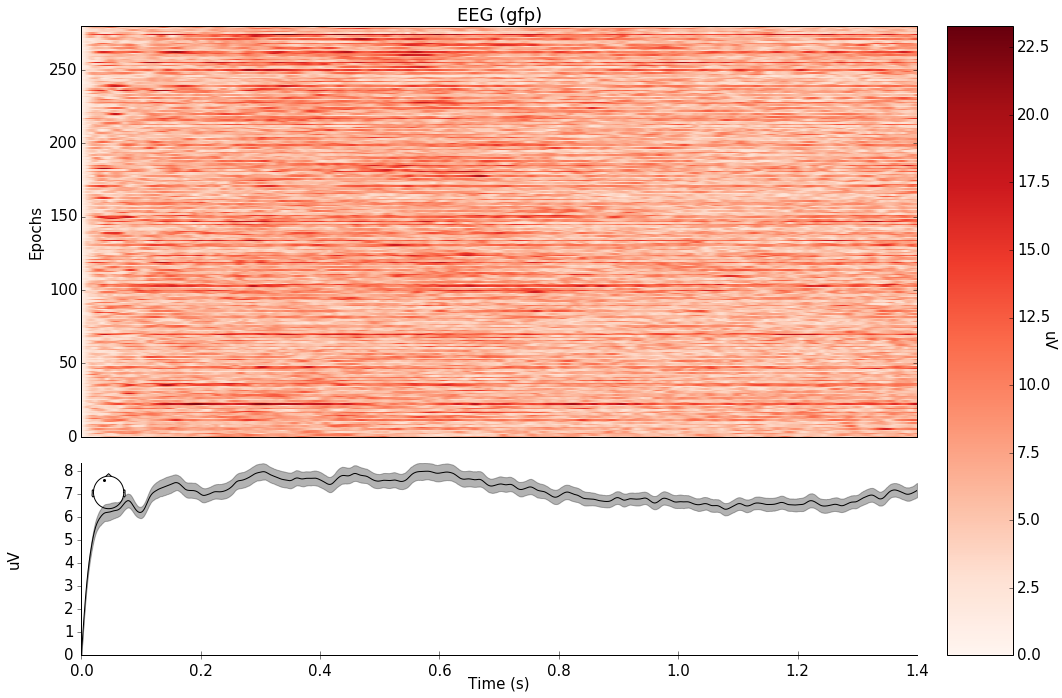

In [90]:
# plots a colorbar with global field power and evoked graph.
epoch.plot_image()



In [115]:
#epochs are separated by events. i.e. each epoch has a specific event.
epoch.events.shape

(280L, 3L)

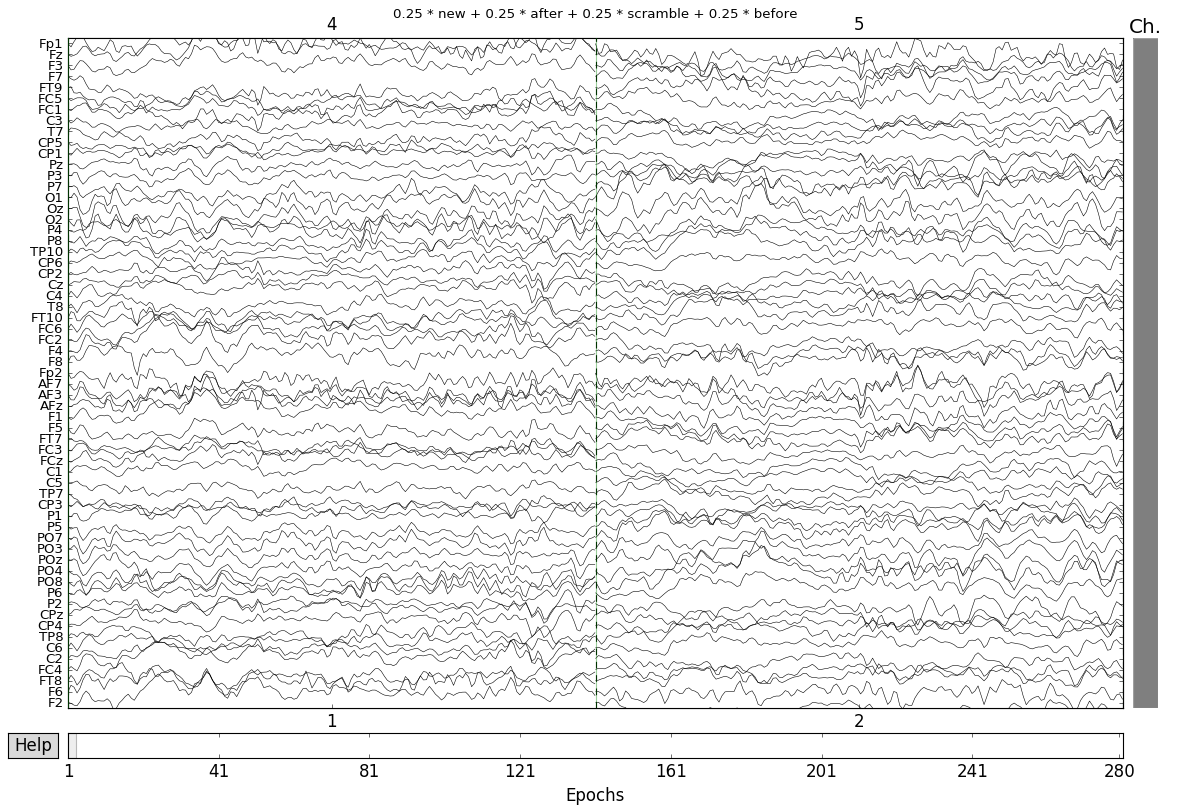

In [120]:
# this plot shows information from all channels for epochs 1 and 2. the numbers on top 4,5 represent the events.
epoch.plot(n_channels = 61, n_epochs= 2);

In [132]:
#print the event_id
epoch.event_id
epoch.events[:,2]

array([ 4,  5, 20, 10,  5,  5,  4, 10, 10, 20,  4,  5, 10, 10,  5,  5, 20,
       10,  4, 10,  4,  5,  5,  5,  5,  5,  4,  4,  5, 10, 10,  4,  5,  4,
        4, 10, 10,  4,  4,  5,  5, 10,  4,  4, 20, 10,  5,  5, 10, 10,  5,
        5,  4,  5, 20, 10, 10, 20,  4, 10,  5, 10,  5, 10, 20,  5,  5,  4,
       10, 20,  5, 20, 20,  4,  4, 20, 20, 10,  4,  5, 10, 10,  5,  5, 10,
        5, 20, 20, 10,  5, 20,  4,  4, 10, 10, 20, 10, 10, 10, 20,  4, 10,
        4, 20,  5,  4,  5, 10,  4,  4, 20,  4, 20, 20, 10, 20, 10,  4, 10,
        4, 10, 20,  4, 10, 10, 20,  5,  5, 20, 10,  4, 20,  5, 20, 20,  4,
       10, 20,  5, 10, 20, 10,  5, 20, 20, 20,  5, 10,  4,  5, 10, 10,  5,
        4,  4, 10, 20, 10,  5, 20,  5,  5, 20,  5,  5, 20,  5,  5, 10,  4,
       20,  4, 10, 20,  4,  5, 10,  4, 10, 10, 20, 20, 10,  4, 10, 20,  5,
        4, 20, 20, 20, 10, 10, 20,  4, 10,  5, 20,  5,  4,  4,  5, 10, 20,
       20,  5, 20,  5,  4,  4, 10, 20, 20, 20, 10,  5, 10,  4,  4, 20, 20,
        5, 20,  4, 20,  5

In [157]:
# not entirely sure what the above cell means, but IF the number 5 means that a scrambled image was seen during that epoch, 
#then I can extract all of the events that have the value 5 within an epoch file and see when the subject saw those images.
scrambled_events = []
for event in epoch.events:
    if event[2] == 5:
        scrambled_events.append(event)
len(scrambled_events)

70

In [21]:
epoch._data[3].shape

(61L, 1401L)

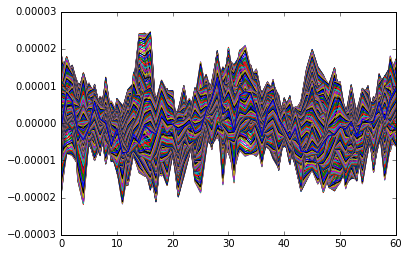

In [22]:
plt.plot(epoch._data[3]);

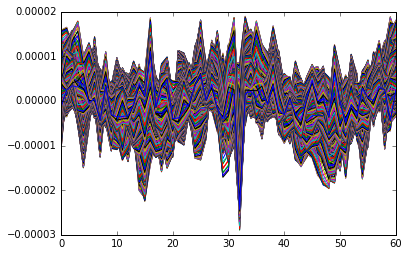

In [23]:
count = 0
# for i in range(2):
plt.plot(epoch._data[4]);

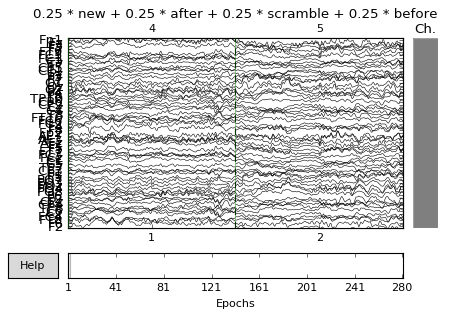

In [24]:
epoch.plot(n_channels = 61, n_epochs= 2 );

In [31]:
#plot all events from one subject
epoch_subj1 = mne.read_epochs(op.join(drive_all_data_path, 'subject1_all_runs-epo.fif'),
                          preload=True)

Reading E:\eeg_data\ica_140_500_0.1\subject1_all_runs-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
1121 matching events found
Created an SSP operator (subspace dimension = 1)
1121 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [34]:
#The shape of this file containing subject 1 all runs has 1121 events.
epoch_subj1._data.shape

(1121L, 61L, 1401L)

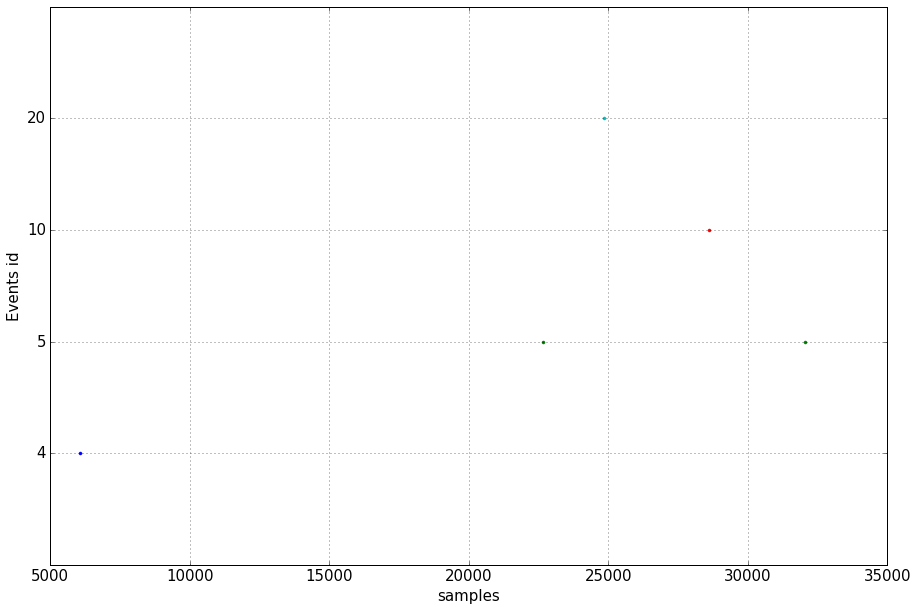

In [39]:
mne.viz.plot_events(epoch_subj1.events[:5]);

In [40]:
epoch_subj1.info

<Info | 18 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, ...
    chs : list | 61 items (EEG: 61)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 40.0 Hz
    meas_date : ndarray | 2017-09-05 13:34:48 GMT
    meas_id : dict | 4 items
    nchan : int | 61
    proc_history : list | 0 items
    projs : list | Average EEG reference: on
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout :

In [42]:
epoch_subj1.get_data

<bound method EpochsFIF.get_data of <EpochsFIF  |  n_events : 1121 (all good), tmin : 0.0 (s), tmax : 1.4 (s), baseline : (0.0, 1.399999976158142), ~731.0 MB, data loaded,
 u'after': 284, u'before': 280, u'new': 293, u'scramble': 264>>

In [47]:
epoch.get_data

<bound method EpochsFIF.get_data of <EpochsFIF  |  n_events : 280 (all good), tmin : 0.0 (s), tmax : 1.4 (s), baseline : (0.0, 0.0), ~182.7 MB, data loaded,
 u'after': 70, u'before': 69, u'new': 71, u'scramble': 70>>

In [55]:
epoch.event_id.values()

[4, 20, 5, 10]

1121 matching events found
Projection vector "Average EEG reference" has magnitude 0.02 (should be unity), applying projector with 1/61 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-114-93733e61bc49>:1: RuntimeWarning: Projection vector "Average EEG reference" has magnitude 0.02 (should be unity), applying projector with 1/61 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  epoch_subj1.plot_image()


0 bad epochs dropped


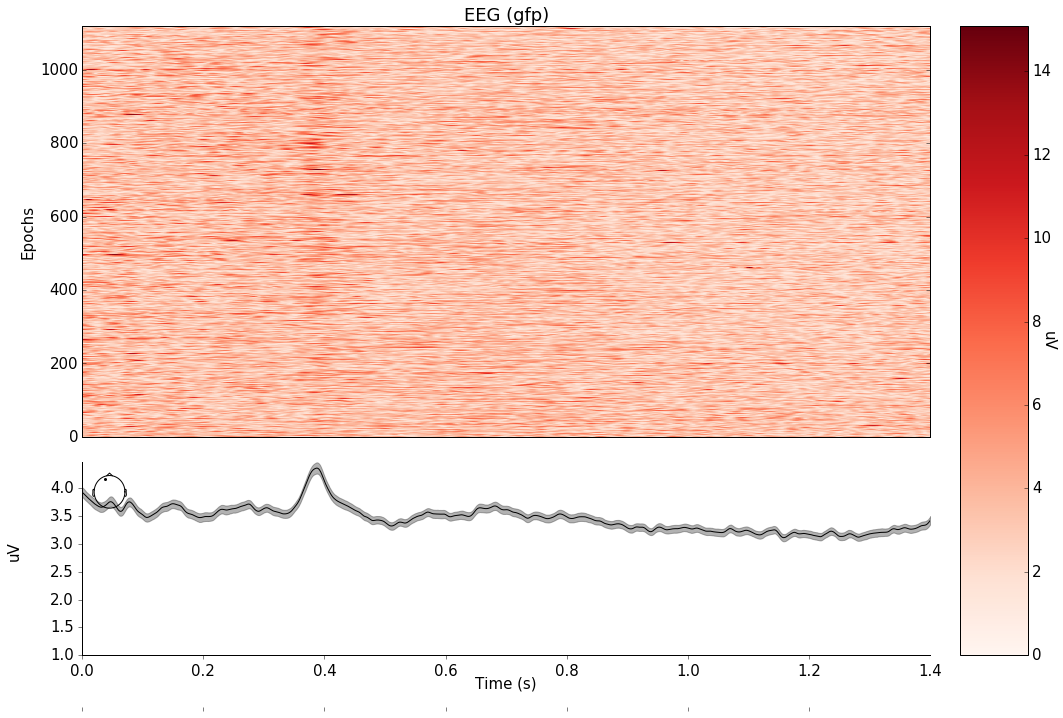

In [114]:
epoch_subj1.plot_image()

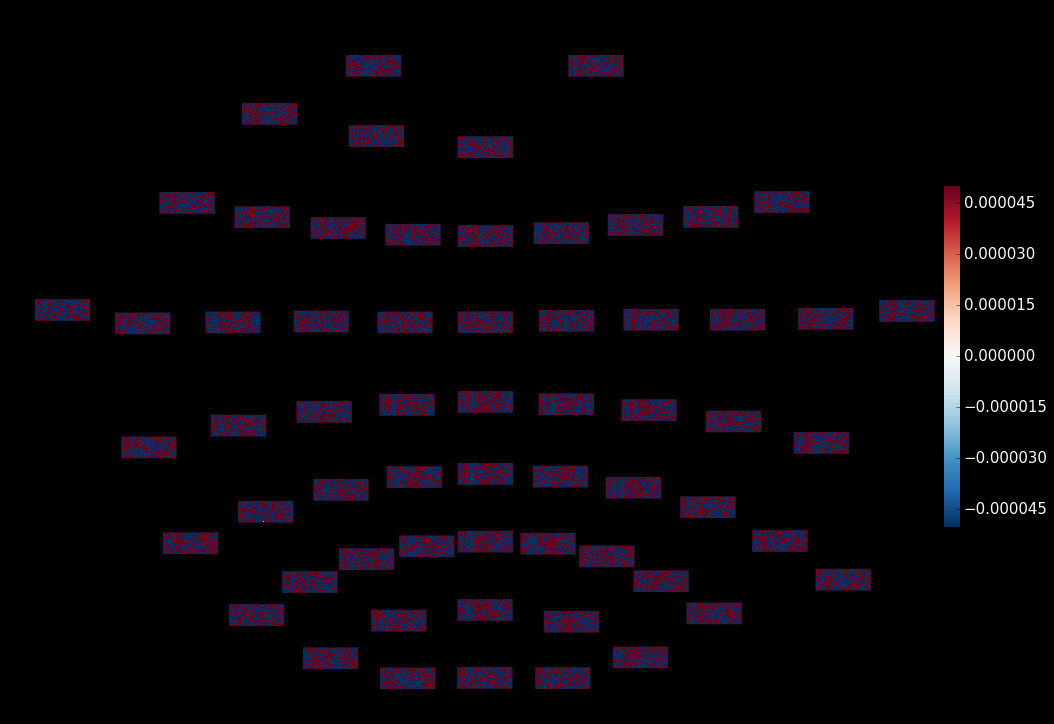

In [101]:
epoch_subj1.plot_topo_image();

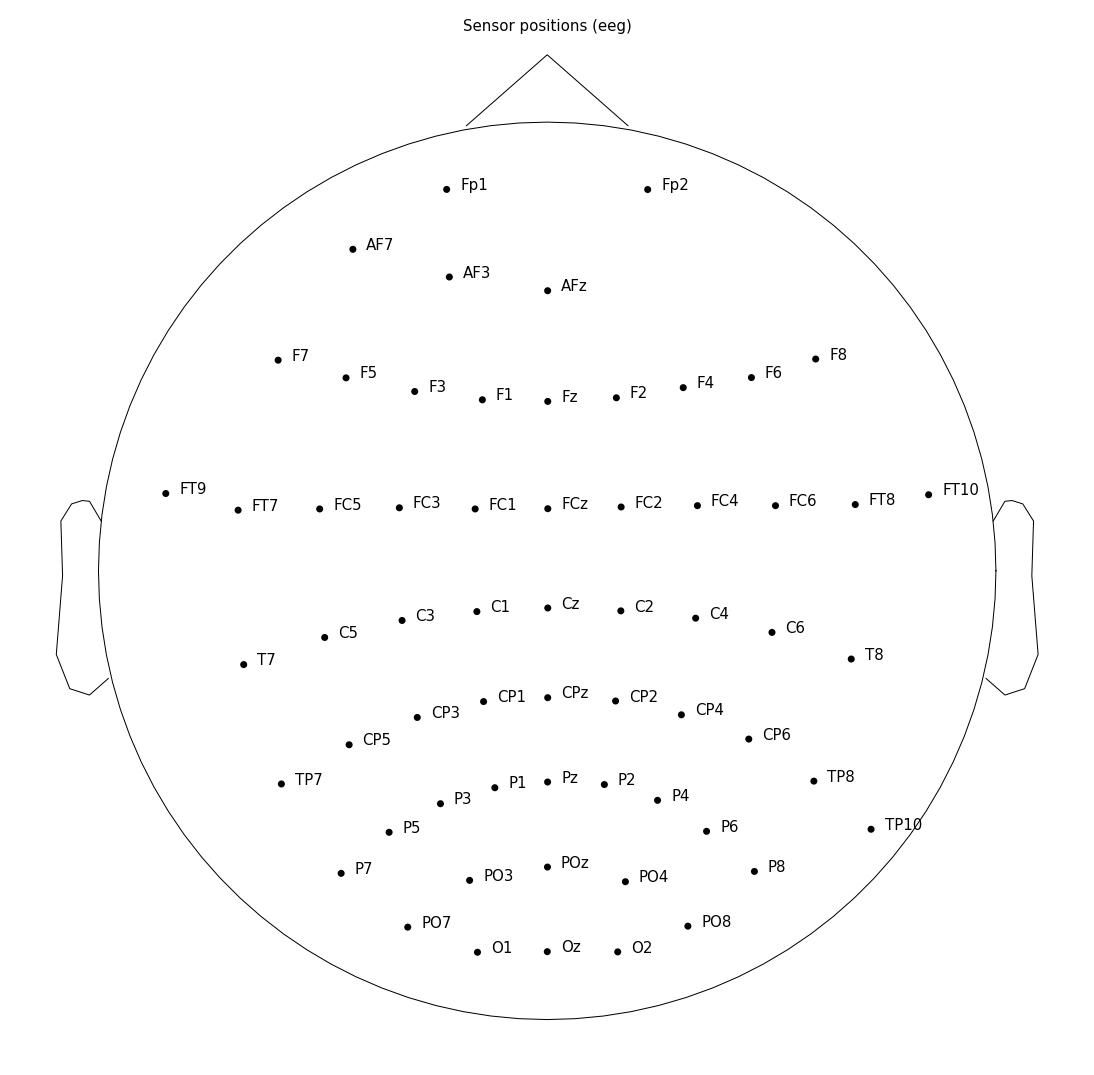

In [112]:
epoch_subj1.plot_sensors(show_names=True, );

In [93]:
epoch_subj1.info.normalize_proj

<bound method Info.normalize_proj of <Info | 18 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, ...
    chs : list | 61 items (EEG: 61)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 40.0 Hz
    meas_date : ndarray | 2017-09-05 13:34:48 GMT
    meas_id : dict | 4 items
    nchan : int | 61
    proc_history : list | 0 items
    projs : list | Average EEG reference: on
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_

In [94]:
epoch_subj1.

<Info | 18 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, ...
    chs : list | 61 items (EEG: 61)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 40.0 Hz
    meas_date : ndarray | 2017-09-05 13:34:48 GMT
    meas_id : dict | 4 items
    nchan : int | 61
    proc_history : list | 0 items
    projs : list | Average EEG reference: on
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout :